<a href="https://colab.research.google.com/github/Ancy-padmanabhan/Assignments/blob/main/AncyP_Assignment_KNN_SVC_Kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
#defining libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#reading the dataset
data=pd.read_csv('titanic_dataset .csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [64]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
data.shape

(891, 12)

In [66]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

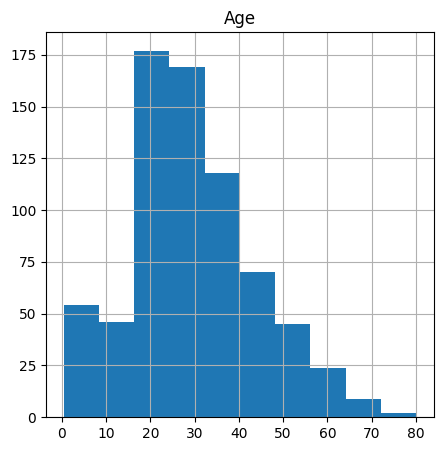

In [67]:
data.hist(column='Age',figsize=(5,5))

In [68]:
#Preprocessing and clearing the null values. The Cabin Column is dropped due to 77% of missing values.Name and Ticket columns are dropped as its not necessary
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = data.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

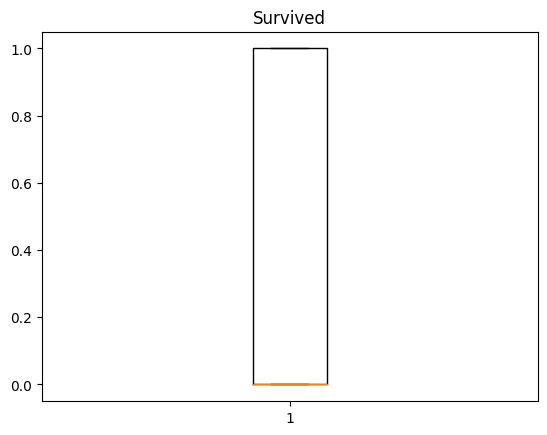

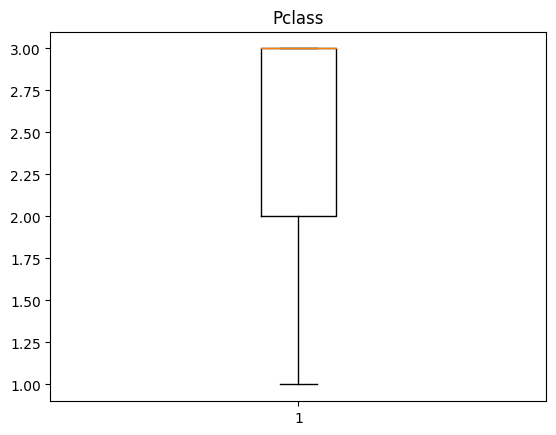

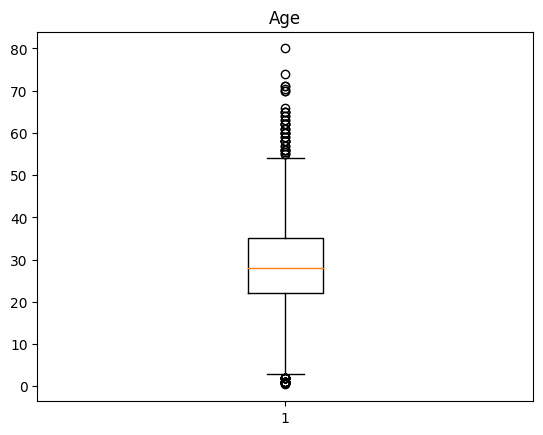

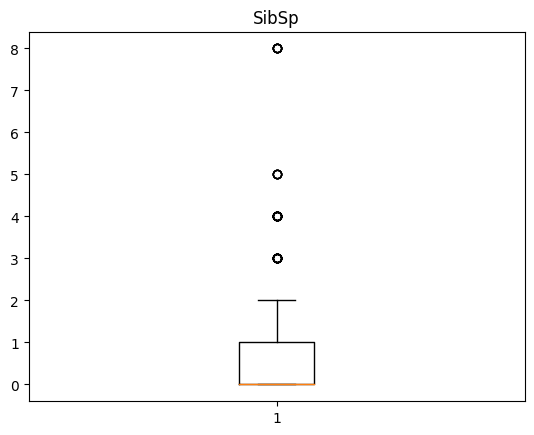

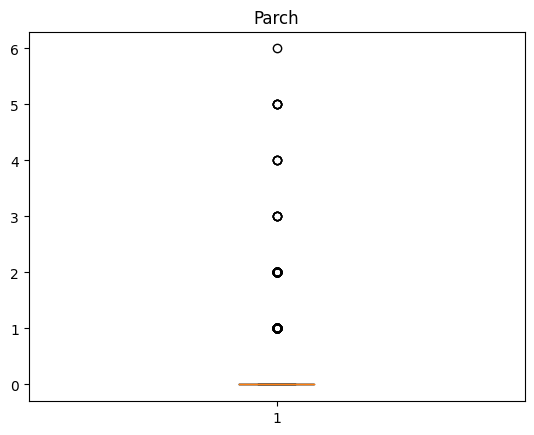

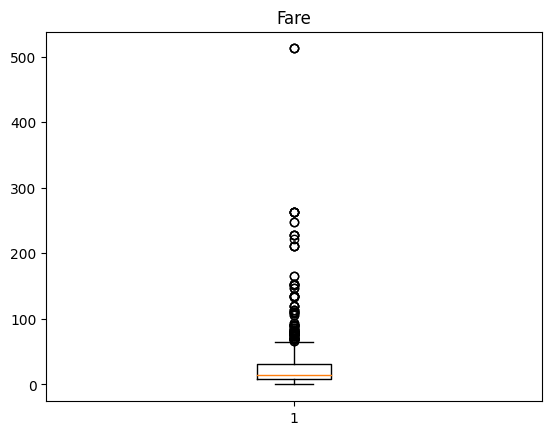

In [69]:
#Plotting all the numeric columns to check for the outliers using boxplots
num_cols = ['Survived','Pclass','Age','SibSp','Parch','Fare']
for i in num_cols:
  plt.figure()
  plt.boxplot(data[i])
  plt.title(i)

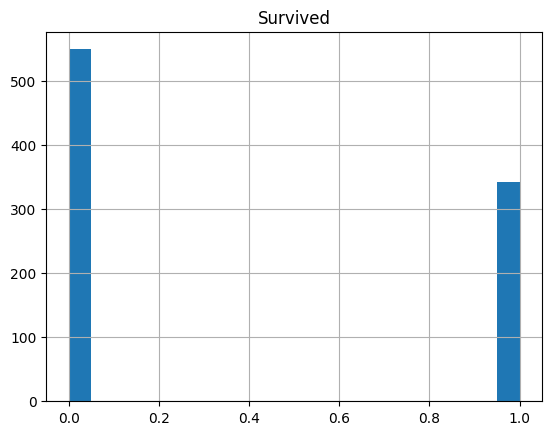

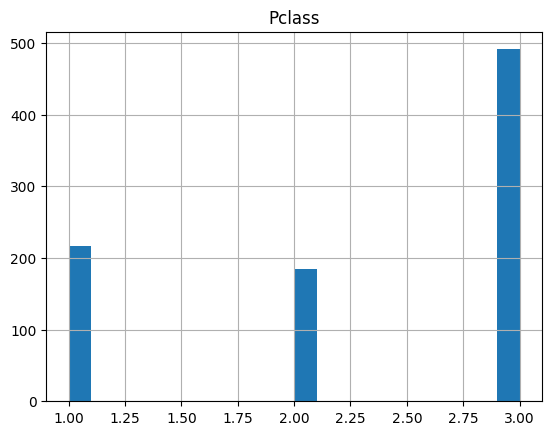

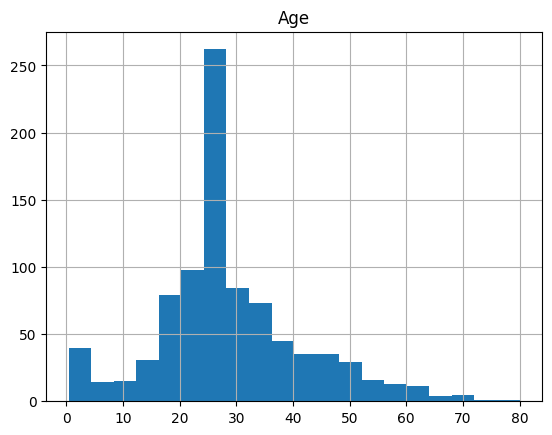

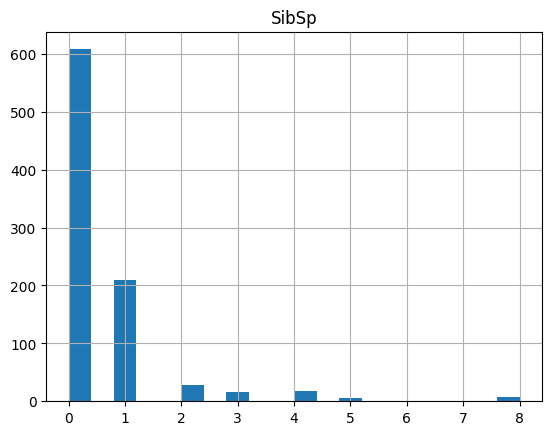

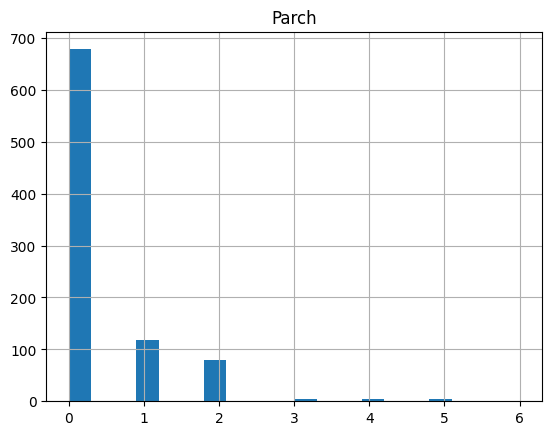

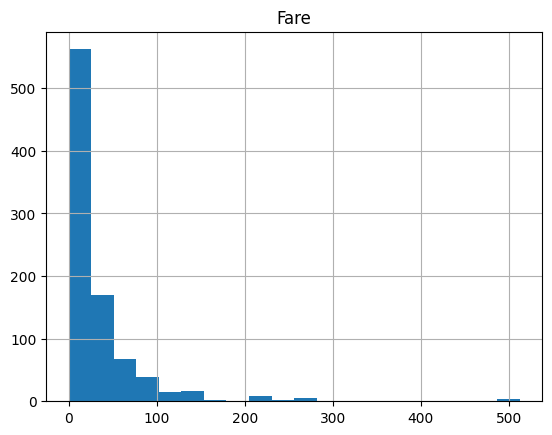

In [70]:
for i in num_cols:
  plt.figure()
  data[i].hist(bins=20)
  plt.title(i)

In [71]:
#Handling Outliers of Columns Age,Sibsp,Fare and Parch
age_q1 = data['Age'].quantile(0.25)
age_q3 = data['Age'].quantile(0.75)
print('Q1 is',age_q1)
print('Q3 is',age_q3)
age_IQR = age_q3-age_q1
print('IQR is',age_IQR)



Q1 is 22.0
Q3 is 35.0
IQR is 13.0


In [72]:
#Finding the upper and lower limit of Age
age_low_lim=age_q1-1.5*age_IQR
age_upp_lim=age_q3+1.5*age_IQR
print('Lower limit is',age_low_lim)
print('Upper limit is',age_upp_lim)

Lower limit is 2.5
Upper limit is 54.5


In [73]:
#Print the outliers and delete the same
outlier=[]
for x in data['Age']:
  if((x>age_upp_lim) | (x<age_low_lim)):
    outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [74]:
#Capping the values to upper and lower limit
data['Age'] = data['Age'].clip(lower=age_low_lim,upper=age_upp_lim)

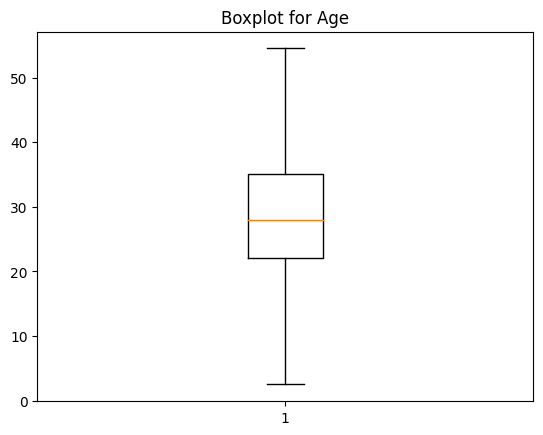

In [75]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')
plt.show()

In [76]:
#FInding Outliers for Sibsp
sibsp_q1 = data['SibSp'].quantile(0.25)
sibsp_q3 = data['SibSp'].quantile(0.75)
print('Q1 is',sibsp_q1)
print('Q3 is',sibsp_q3)
sibsp_IQR = sibsp_q3-sibsp_q1
print('IQR is',sibsp_IQR)
sibsp_low_lim=sibsp_q1-1.5*sibsp_IQR
sibsp_upp_lim=sibsp_q3+1.5*sibsp_IQR
print('Lower limit is',sibsp_low_lim)
print('Upper limit is',sibsp_upp_lim)

Q1 is 0.0
Q3 is 1.0
IQR is 1.0
Lower limit is -1.5
Upper limit is 2.5


In [77]:
#Finding outliers
sibsp_outlier=[]
for x in data['SibSp']:
  if((x>sibsp_upp_lim) or (x<sibsp_low_lim)):
    sibsp_outlier.append(x)
sibsp_outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [78]:
#Capping outliers to upper limit and lower limit
data['SibSp'] = data['SibSp'].clip(lower=sibsp_low_lim,upper=sibsp_upp_lim)

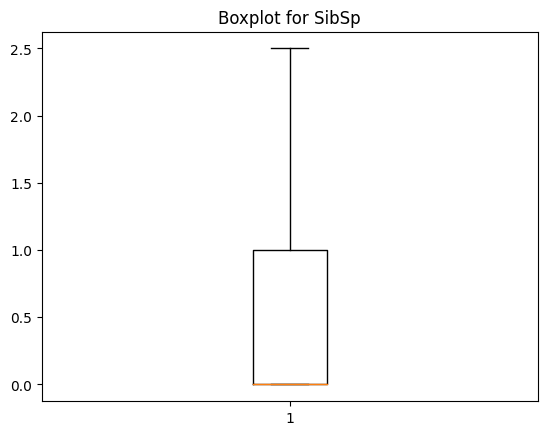

In [79]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')
plt.show()

In [80]:
#Finding Outliers for Fare
fare_q1 = data['Fare'].quantile(0.25)
fare_q3 = data['Fare'].quantile(0.75)
print('Q1 is',fare_q1)
print('Q3 is',fare_q3)
fare_IQR = fare_q3-fare_q1
print('IQR is',fare_IQR)
fare_low_lim=fare_q1-1.5*fare_IQR
fare_upp_lim=fare_q3+1.5*fare_IQR
print('Lower limit is',fare_low_lim)
print('Upper limit is',fare_upp_lim)

Q1 is 7.9104
Q3 is 31.0
IQR is 23.0896
Lower limit is -26.724
Upper limit is 65.6344


In [81]:
#The outliers in Fare column
fare_outlier=[]
for x in data['Fare']:
  if((x>fare_upp_lim) | (x<fare_low_lim)):
    fare_outlier.append(x)
fare_outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [82]:
#Capping outliers to upper limit and lower limit
data['Fare'] = data['Fare'].clip(lower=fare_low_lim,upper=fare_upp_lim)

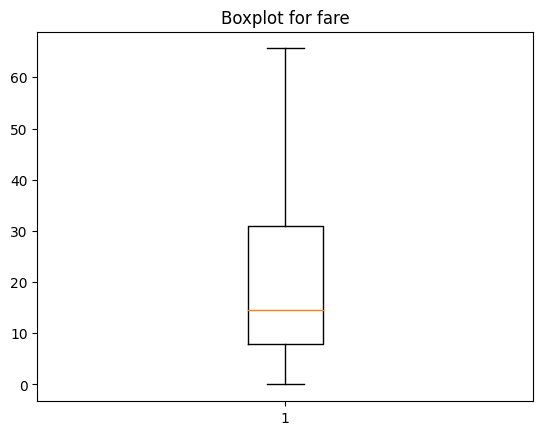

In [83]:
plt.boxplot(data['Fare'])
plt.title('Boxplot for fare')
plt.show()

In [84]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [85]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [86]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [87]:
data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [88]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [89]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [90]:
#Encoding the Sex and Embarked Columns
data=pd.get_dummies(data,dtype=int)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1.0,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1.0,0,65.6344,1,0,1,0,0
2,3,1,3,26.0,0.0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1.0,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0.0,0,8.0500,0,1,0,0,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    int64  
 8   Sex_male     891 non-null    int64  
 9   Embarked_C   891 non-null    int64  
 10  Embarked_Q   891 non-null    int64  
 11  Embarked_S   891 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 83.7 KB


<Axes: >

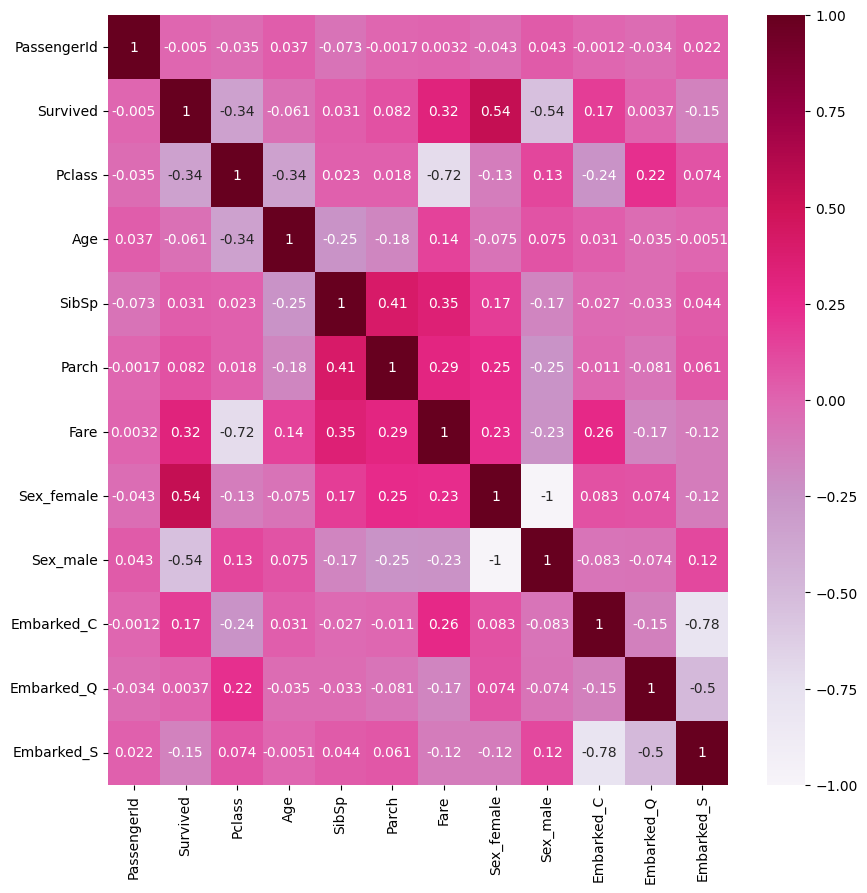

In [92]:
#Plotting the correlation matrix
corr=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cmap='PuRd')

In [93]:
#Defining the target variable and dependant variables
y=data['Survived']
X=data.drop(['Survived'],axis=1)

In [94]:
#Splitting the data into train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.30)


In [95]:
X_train.shape

(623, 11)

In [96]:
X_test.shape

(268, 11)

In [97]:
#Scaling the train and test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [98]:
from sklearn.metrics import confusion_matrix , accuracy_score

**KNN Classifier**

In [99]:
#Finding accuracy score for each k value
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.7686567164179104,
 0.7910447761194029,
 0.7985074626865671,
 0.8097014925373134,
 0.8097014925373134,
 0.8022388059701493,
 0.8059701492537313,
 0.8059701492537313,
 0.8059701492537313,
 0.8097014925373134,
 0.8097014925373134,
 0.8097014925373134,
 0.8208955223880597,
 0.8246268656716418]

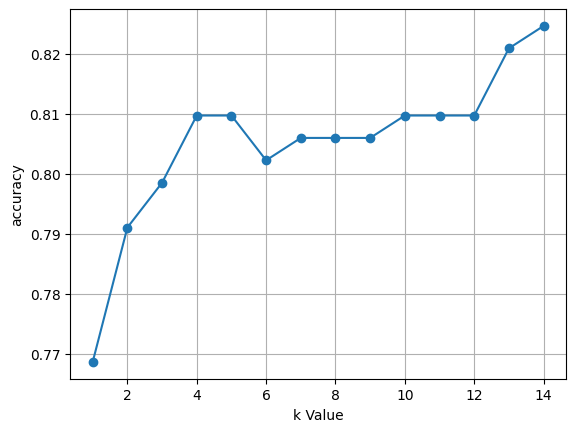

In [100]:
#plotting k vs accuracy to know the maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [101]:
#Maximum Accuracy is at K=14
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [102]:
#Confusion matrix for kNN
print('Confusion Matrix :\n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix :
  [[146  11]
 [ 36  75]]


In [103]:
#Evaluation metrices
print('KNN Accuracy is', accuracy_score(y_test, y_pred_knn))

KNN Accuracy is 0.8246268656716418


## **Support Vector Machine**

In [104]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train , y_train)
y_pred_svm= svm_clf.predict(X_test)

In [105]:
#Confusion matrix for SVM
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred_svm))

Confusion Matrix
 [[134  23]
 [ 33  78]]


In [106]:
#Evaluation metrices
print('SVM Accuracy is', accuracy_score(y_test, y_pred_svm))

SVM Accuracy is 0.7910447761194029


## **K_fold Cross Validation**

In [107]:
#K-Fold cross validation for KNN
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores_knn = cross_val_score(knn, X_train, y_train, cv=kf)
print(kf_scores_knn)
print("K-Fold Cross-Validation Accuracy_knn:", kf_scores_knn.mean())

[0.816      0.8        0.752      0.79032258 0.83870968]
K-Fold Cross-Validation Accuracy_knn: 0.7994064516129032


In [108]:
#K-Fold cross validation for SVC
from sklearn.model_selection import KFold,cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_scores = cross_val_score(SVC(), X_train, y_train, cv=kf)
print(kf_scores)
print("K-Fold Cross-Validation Accuracy_svc:", kf_scores.mean())

[0.8        0.792      0.784      0.7983871  0.84677419]
K-Fold Cross-Validation Accuracy_svc: 0.8042322580645163


**Stratified K-Fold cross Validation**

In [109]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores_knn = cross_val_score(knn, X_train, y_train, cv=skf)
print(skf_scores_knn)
print("Stratified K-Fold Cross-Validation Accuracy_knn:", skf_scores_knn.mean())

[0.808      0.848      0.792      0.79032258 0.75      ]
Stratified K-Fold Cross-Validation Accuracy_knn: 0.7976645161290323


In [110]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_scores_svc = cross_val_score(SVC(), X_train, y_train, cv=skf)
print(skf_scores_svc)
print("Stratified K-Fold Cross-Validation Accuracy_svc:", skf_scores_svc.mean())

[0.824      0.832      0.808      0.78225806 0.75      ]
Stratified K-Fold Cross-Validation Accuracy_svc: 0.7992516129032258
